This notebook provides some code for plotting the results obtained from the Exploratory-Mean-Variance (EMV) algorithm (Wang \& Zhou, 2020) in a Reinforcement Learning (RL) framework.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

%pylab inline
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

Populating the interactive namespace from numpy and matplotlib


Firstly, we define some functions for reading and saving data.

In [18]:
def __read_(name, par, market):
    if market.lower() == 'exp':
        df = pd.read_csv('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-codes/data/exp_' + name + '_μ' + str(par['μ']) + '_r' + str(par['r']) + '_σ' + str(par['σ']) + '_ρ' + str(par['ρ']) + '_z' + str(par['z']) + '.csv', sep=',')
    if market.lower() == 'log':
        df = pd.read_csv('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-codes/data/log_' + name + '_μ' + str(par['μ']) + '_r' + str(par['r']) + '_σ' + str(par['σ']) + '_ρ' + str(par['ρ']) + '_z' + str(par['z']) + '.csv', sep=',')
    if market.lower() == 'crr':
        df = pd.read_csv('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-codes/data/crr_' + name + '_μ' + str(par['μ']) + '_r' + str(par['r']) + '_σ' + str(par['σ']) + '_ρ' + str(par['ρ']) + '_z' + str(par['z']) + '.csv', sep=',')
    if market.lower() != 'exp' and market.lower() != 'log' and market.lower() != 'crr': 
        df = pd.read_csv('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-codes/data/' + market + '_' + name + '_z' + str(par['z']) + '.csv', sep=',')
    return df

def __save_eps(name, par, market):
    if market.lower() == 'exp':
        plt.savefig('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-tex/main/img/exp_' + name + '_μ' + str(par['μ']) + '_r' + str(par['r']) + '_σ' + str(par['σ']) + '_ρ' + str(par['ρ']) + '_z' + str(par['z']) + '.eps', format='eps')
    if market.lower() == 'log':
        plt.savefig('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-tex/main/img/log_' + name + '_μ' + str(par['r']) + '_r' + str(par['r']) + '_σ' + str(par['σ']) + '_ρ' + str(par['ρ']) + '_z' + str(par['z']) + '.eps', format='eps')
    if market.lower() == 'crr':
        plt.savefig('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-tex/main/img/crr_' + name + '_μ' +str(par['r']) + '_r' + str(par['r']) + '_σ' + str(par['σ']) + '_ρ' + str(par['ρ']) + '_z' + str(par['z']) + '.eps', format='eps')
    if market.lower() != 'exp' and market.lower() != 'log' and market.lower() != 'crr': 
        plt.savefig('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-tex/main/img/' + market + name + '.eps', format='eps')

def __save_png(name, par, market):
    if market.lower() == 'exp':
        plt.savefig('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-codes/img/exp_' + name + '_μ' + str(par['μ']) + '_r' + str(par['r']) + '_σ' + str(par['σ']) + '_ρ' + str(par['ρ']) + '_z' + str(par['z']) + '.png', format='png')
    if market.lower() == 'log':
        plt.savefig('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-codes/img/log_' + name + '_μ' + str(par['μ']) + '_r' + str(par['r']) + '_σ' + str(par['σ']) + '_ρ' + str(par['ρ']) + '_z' + str(par['z']) + '.png', format='png')
    if market.lower() == 'crr':
        plt.savefig('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-codes/img/crr_' + name + '_μ' + str(par['μ']) + '_r' + str(par['r']) + '_σ' + str(par['σ']) + '_ρ' + str(par['ρ']) + '_z' + str(par['z']) + '.png', format='png')
    if market.lower() != 'exp' and market.lower() != 'log' and market.lower() != 'crr': 
        plt.savefig('/Users/rubenexojo/Library/Mobile Documents/com~apple~CloudDocs/MSc Mathematical Finance - Manchester/dissertation/dissertation-tex/main/img/' + market + name + '.png', format='png')

def __annualised_return_(μ, par, market):
    figure(num=None, figsize=(10, 6), dpi=70, facecolor='w', edgecolor='k')
    ### GRID
    plt.grid(color='k', linestyle='-.', linewidth=0.05)
    ### PLOT
    k = [i for i in range(len(μ))]
    plt.plot(k, μ, color='darkblue')
    ## LABELS
    plt.xlabel(r'Aggregated number of episodes', labelpad=20, fontsize=16)
    plt.ylabel(r'Annualised Return', labelpad=20, fontsize=16)
    __save_png('annualised_return', par, market)
    __save_eps('annualised_return', par, market)

def __sample_mean_(mean, real_mean, par, market):
    figure(num=None, figsize=(10, 6), dpi=70, facecolor='w', edgecolor='k')
    ### GRID
    plt.grid(color='k', linestyle='-.', linewidth=0.05)
    ### PLOT
    k = [i for i in range(len(mean))]
    plt.plot(k, mean, color='darkblue')
    plt.plot(k, real_mean, color = 'red', label=r'$z=$' + str(par['z']), linestyle='-.', linewidth=1.6)
    ## LEGEND
    plt.legend(loc="lower right", fontsize=15)
    ## LABELS
    plt.xlabel(r'Aggregated number of episodes', labelpad=20, fontsize=16)
    plt.ylabel(r'Sample Mean', labelpad=20, fontsize=16)
    __save_png('sample_mean', par, market)
    __save_eps('sample_mean', par, market)

def __variance_(var, par, market):
    figure(num=None, figsize=(10, 6), dpi=70, facecolor='w', edgecolor='k')
    ### GRID
    plt.grid(color='k', linestyle='-.', linewidth=0.05)
    ### PLOT
    k = [i for i in range(len(var))]
    plt.plot(k, var, color='darkblue')
    ## LABELS
    plt.xlabel(r'Aggregated number of episodes', labelpad=20, fontsize=16)
    plt.ylabel(r'Variance', labelpad=20, fontsize=16)
    __save_eps('variance', par, market)
    __save_png('variance', par, market)

def __std_(std, par, market):
    figure(num=None, figsize=(10, 6), dpi=70, facecolor='w', edgecolor='k')
    ### GRID
    plt.grid(color='k', linestyle='-.', linewidth=0.05)
    ### PLOT
    k = [i for i in range(len(std))]
    plt.plot(k, std, color='darkblue')
    ## LABELS
    plt.xlabel(r'Aggregated number of episodes', labelpad=20, fontsize=16)
    plt.ylabel(r'Standard Deviation', labelpad=20, fontsize=16)
    __save_png('std', par, market)
    __save_eps('std', par, market)

def __θ0_(θ0, par, market):
    figure(num=None, figsize=(10, 6), dpi=70, facecolor='w', edgecolor='k')
    ### GRID
    plt.grid(color='k', linestyle='-.', linewidth=0.05)
    ### PLOT
    k = [i for i in range(len(θ0))]
    plt.plot(k, θ0, color='darkblue')
    ## LABELS
    plt.xlabel(r'Number of episodes, $k$', labelpad=20, fontsize=16)
    plt.ylabel(r'$\theta_0$', labelpad=20, fontsize=16)
    __save_png('θ0', par, market)
    __save_eps('θ0', par, market)

def __θ1_(θ1, par, market):
    figure(num=None, figsize=(10, 6), dpi=70, facecolor='w', edgecolor='k')
    ### GRID
    plt.grid(color='k', linestyle='-.', linewidth=0.05)
    ### PLOT
    k = [i for i in range(len(θ1))]
    plt.plot(k, θ1, color='darkblue')
    ## LABELS
    plt.xlabel(r'Number of episodes, $k$', labelpad=20, fontsize=16)
    plt.ylabel(r'$\theta_1$', labelpad=20, fontsize=16)
    __save_png('θ1', par, market)
    __save_eps('θ1', par, market)

def __θ2_(θ2, par, market):
    figure(num=None, figsize=(10, 6), dpi=70, facecolor='w', edgecolor='k')
    ### GRID
    plt.grid(color='k', linestyle='-.', linewidth=0.05)
    ### PLOT
    k = [i for i in range(len(θ2))]
    plt.plot(k, θ2, color='darkblue')
    ## LABELS
    plt.xlabel(r'Number of episodes, $k$', labelpad=20, fontsize=16)
    plt.ylabel(r'$\theta_2$', labelpad=20, fontsize=16)
    __save_png('θ2', par, market)
    __save_eps('θ2', par, market)

def __θ3_(θ3, par, market, ρ2 = None):
    figure(num=None, figsize=(10, 6), dpi=70, facecolor='w', edgecolor='k')
    ### GRID
    plt.grid(color='k', linestyle='-.', linewidth=0.05)
    ### PLOT
    k = [i for i in range(len(θ3))]
    plt.plot(k, θ3, color='darkblue')
    if ρ2:
        plt.plot(k, ρ2, color = 'red', label=r'$\rho^2$', linestyle='-.', linewidth=1.6)
        ## LEGEND
        plt.legend(loc="lower right", fontsize=15)
    ## LABELS
    plt.xlabel(r'Number of episodes, $k$', labelpad=20, fontsize=16)
    plt.ylabel(r'$\theta_3$', labelpad=20, fontsize=16)
    __save_png('θ3', par, market)
    __save_eps('θ3', par, market)

def __ϕ1_(ϕ1, par, market):
    figure(num=None, figsize=(10, 6), dpi=70, facecolor='w', edgecolor='k')
    ### GRID
    plt.grid(color='k', linestyle='-.', linewidth=0.05)
    ### PLOT
    k = [i for i in range(len(ϕ1))]
    plt.plot(k, ϕ1, color='darkblue')
    ## LABELS
    plt.xlabel(r'Number of episodes, $k$', labelpad=20, fontsize=16)
    plt.ylabel(r'$\phi_1$', labelpad=20, fontsize=16)
    __save_png('ϕ1', par, market)
    __save_eps('ϕ1', par, market)

def __ϕ2_(ϕ2, par, market):
    figure(num=None, figsize=(10, 6), dpi=70, facecolor='w', edgecolor='k')
    ### GRID
    plt.grid(color='k', linestyle='-.', linewidth=0.05)
    ### PLOT
    k = [i for i in range(len(ϕ2))]
    plt.plot(k, ϕ2, color='darkblue')
    ## LABELS
    plt.xlabel(r'Number of episodes, $k$', labelpad=20, fontsize=16)
    plt.ylabel(r'$\phi_2$', labelpad=20, fontsize=16)
    __save_png('ϕ2', par, market)
    __save_eps('ϕ2', par, market)

Now, some functions for plotting data.

In [20]:
def __plot_control_parameters__(par, market):
    df          = __read_('sample_parameters', par, market)
    episodes    = df['k'].tolist()
    real_mean   = [par['z'] for _ in episodes]
    mean        = df['mean'].tolist()
    var         = df['variance'].tolist()
    std         = df['std'].tolist()
    μ           = df['μ'].tolist()
    # Plot
    __annualised_return_(μ, par, market)
    __variance_(var, par, market)
    __std_(std, par, market)
    __sample_mean_(mean, real_mean, par, market)
    
def __plot_rl_parameters__(par, market):
    df = __read_('rl_parameters', par, market)
    θ0 = df['θ0'].tolist()
    θ1 = df['θ1'].tolist()
    θ2 = df['θ2'].tolist()
    θ3 = df['θ3'].tolist()
    ϕ1 = df['ϕ1'].tolist()
    ϕ2 = df['ϕ2'].tolist()
    if market.lower() != 'exp' and market.lower() != 'log' and market.lower() != 'crr': 
        __θ0_(θ0, par, market)
        __θ1_(θ1, par, market)
        __θ2_(θ2, par, market)
        __θ3_(θ3, par, market)
        __ϕ1_(ϕ1, par, market)
        __ϕ2_(ϕ2, par, market)
    else:
        ρ2 = [par['ρ']**2 for _ in range(len(θ3))]
        __θ3_(θ3, par, market, ρ2)

An example for $\mu = 0.5$, $r = 0.02$, $\sigma = 0.1$, $\rho = 4.8$ and $z=1.4$ where the sample paths have been generated using the closed-form solution of the Black-Scholes stochastic differential equation.

Four figures are provided:

    1. Annualised return for an aggregated set of episodes (20 episodes each class) converges very fast to 0.4, approximately.
    2. Variance (and therefore Standard Deviation) decreases as the number of episodes increases.
    3. Sample mean converges to z=1.4.

As we can see, these results agrees with our desires: minimise variance for a given expectation. In this case, we are fixing the expecation (sample mean), $z=1.4$, and minimising the variance (decreasing as the number of episodes increases).

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


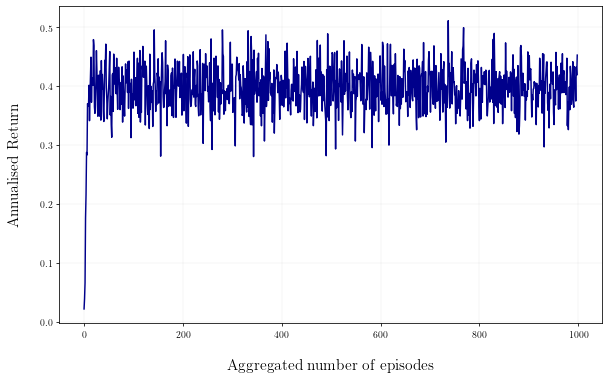

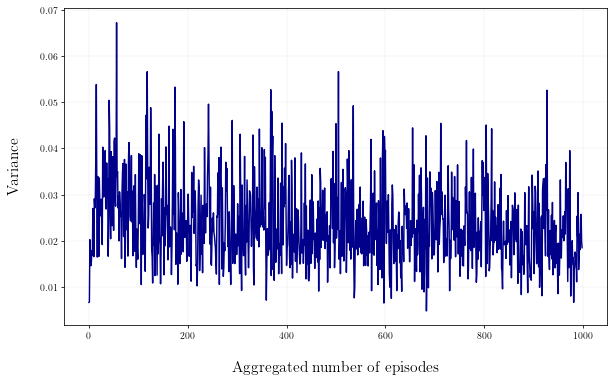

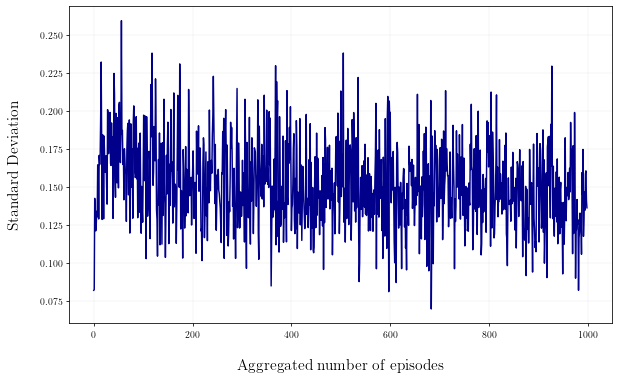

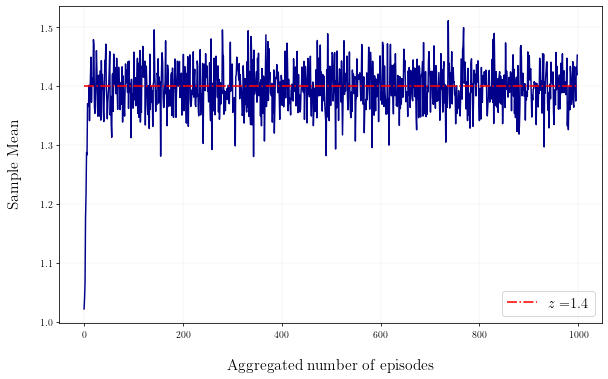

In [35]:
par = {'μ': 0.3, 'r': 0.02, 'σ': 0.1, 'ρ': 2.8, 'z': 1.4}
__plot_control_parameters__(par, 'log')

Finally, we plot the evolution of the approximation of $\theta_3$.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


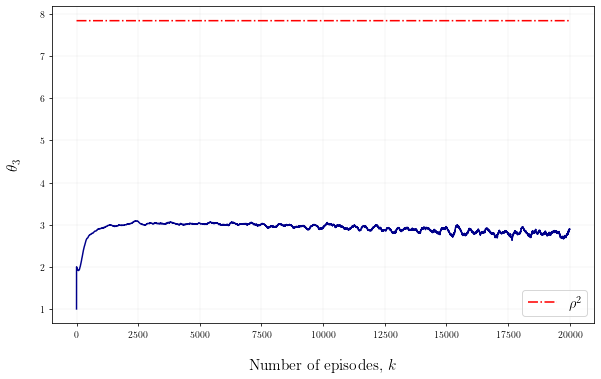

In [36]:
__plot_rl_parameters__(par, 'log')

Now some real data.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


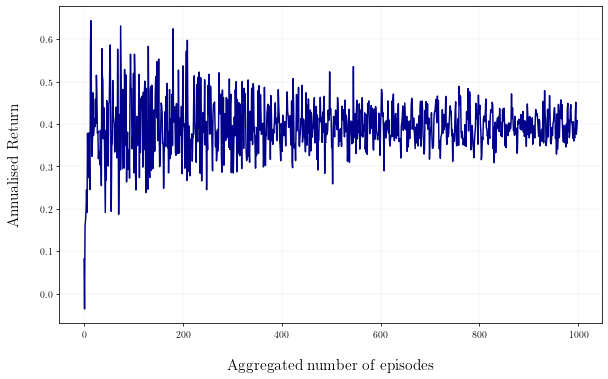

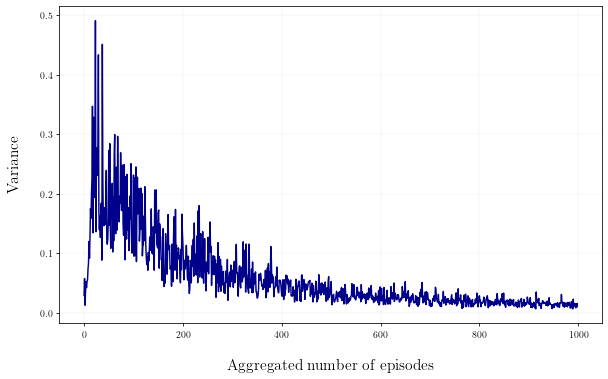

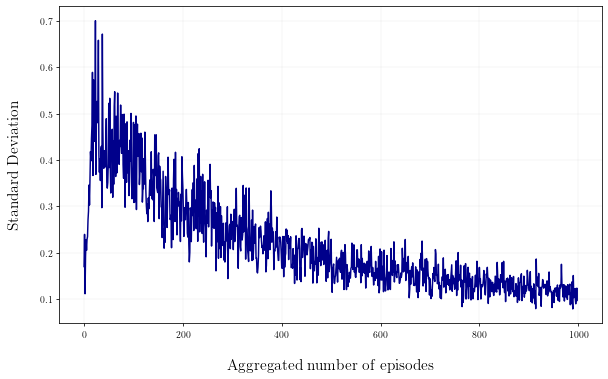

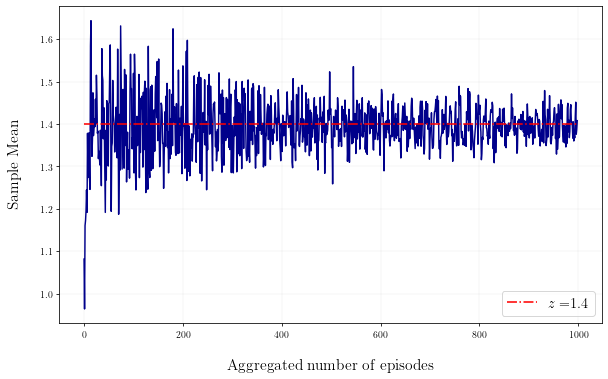

In [12]:
par = {'z': 1.4}
__plot_control_parameters__(par, 'ibex_24_07_year')

NameError: name 'φ2' is not defined

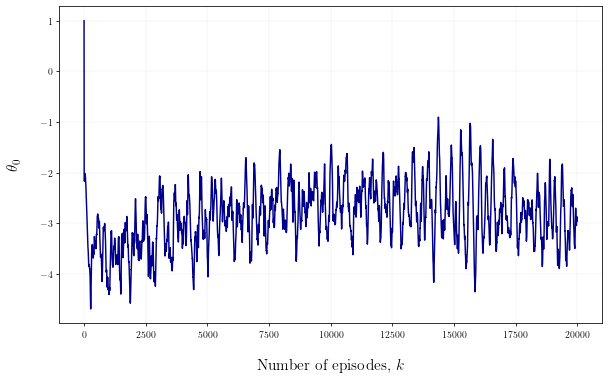

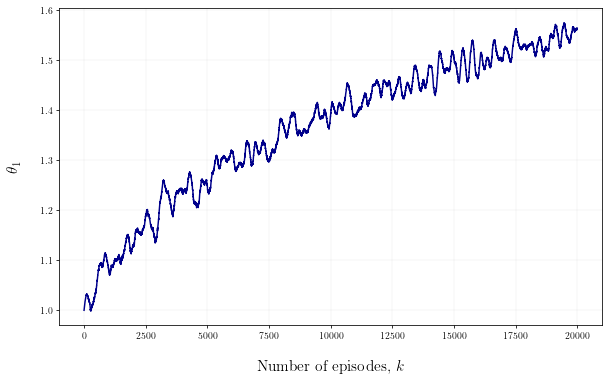

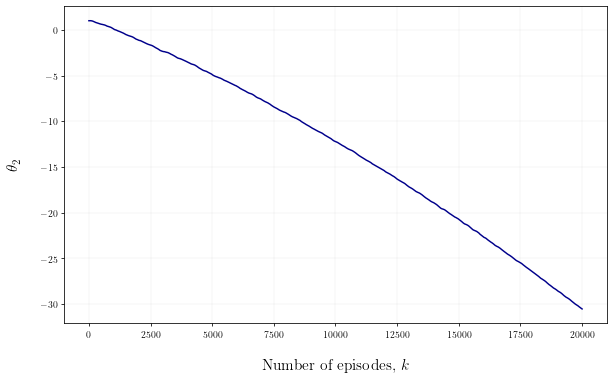

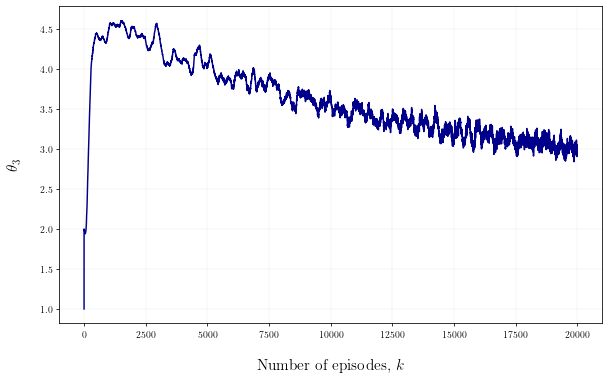

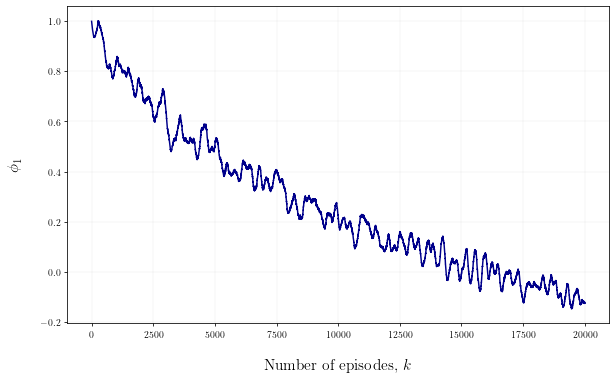

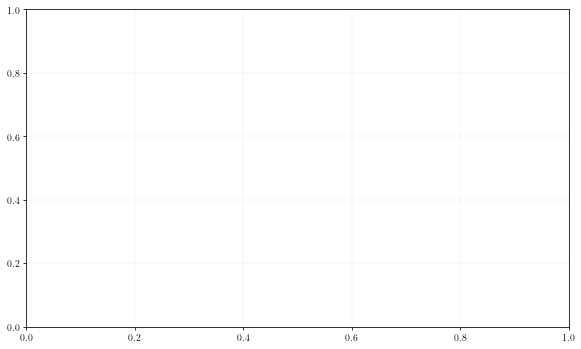

In [21]:
__plot_rl_parameters__(par, 'ibex_24_07_year')